In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#  Load  dataset

In [2]:
df =pd.read_excel('D:/quetions/capstone/online_retail/Online_Retail.xlsx')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Check for missing values

In [6]:
missing_values = df.isnull().sum()

In [10]:
missing_values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

 Remove rows with missing values

In [8]:
data_cleaned = df.dropna()

In [9]:
data_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [22]:
df.dropna(subset=['CustomerID'], inplace=True)

In [23]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


#  Calculate order frequency (number of unique invoices per customer)

In [24]:
order_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

In [25]:
order_frequency

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


# Calculate purchase history (total quantity purchased by the customer)

In [26]:
purchase_history = df.groupby('CustomerID')['Quantity'].sum().reset_index()

In [27]:
purchase_history

,CustomerID,Quantity
0,12346.0,0
1,12347.0,2458
2,12348.0,2341
3,12349.0,631
4,12350.0,197
...,...,...
4367,18280.0,45
4368,18281.0,54
4369,18282.0,98
4370,18283.0,1397


In [30]:
df['TotalSpending'] = df['Quantity'] * df['UnitPrice']


In [31]:
df['TotalSpending']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalSpending, Length: 406829, dtype: float64

# Calculate average spending per order 

In [32]:
avg_spending = df.groupby('CustomerID')['TotalSpending'].mean().reset_index()

In [33]:
avg_spending

,CustomerID,TotalSpending
0,12346.0,0.000000
1,12347.0,23.681319
2,12348.0,57.975484
3,12349.0,24.076027
4,12350.0,19.670588
...,...,...
4367,18280.0,18.060000
4368,18281.0,11.545714
4369,18282.0,13.584615
4370,18283.0,2.771005


# feature DataFrame

In [36]:
features = order_frequency.merge(purchase_history, on='CustomerID', how='inner')
features = features.merge(avg_spending, on='CustomerID', how='inner')

In [37]:
features.columns = ['CustomerID', 'OrderFrequency', 'PurchaseHistory', 'AvgSpending']

In [38]:
features.columns

Index(['CustomerID', 'OrderFrequency', 'PurchaseHistory', 'AvgSpending'], dtype='object')

# Standardize the features

In [39]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.drop('CustomerID', axis=1))

In [40]:
scaled_features

array([[-0.32936215, -0.24021456, -0.22652704],
       [ 0.20610242,  0.28586959, -0.04051308],
       [-0.11517632,  0.26082816,  0.22886353],
       ...,
       [-0.22226923, -0.21923969, -0.11982149],
       [ 1.16993863,  0.05878444, -0.20476112],
       [-0.22226923,  0.09923599, -0.02036108]])

# Apply PCA

In [43]:
pca = PCA(n_components=3)  # Choose the number of components
reduced_features = pca.fit_transform(scaled_features)

In [44]:
reduced_features

array([[-0.43450605,  0.14872932,  0.08112361],
       [ 0.33660317,  0.09262838,  0.06292241],
       [ 0.14198799, -0.23281329,  0.24354222],
       ...,
       [-0.32783191,  0.06504948,  0.01102921],
       [ 0.81599461,  0.42188936, -0.75518296],
       [-0.08737829, -0.01641561,  0.2275116 ]])

# Determine the optimal number of clusters (Elbow Method)


In [45]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(reduced_features)
    wcss.append(kmeans.inertia_)

In [46]:
wcss

[13116.000000000002,
 9034.206809620062,
 7204.498627036647,
 5837.642548039061,
 4690.175745458504,
 3713.2368856609996,
 3023.1265889969827,
 2584.5443371508827,
 2176.6331178877117,
 1904.464580815224]

#  Plot the Elbow Method graph

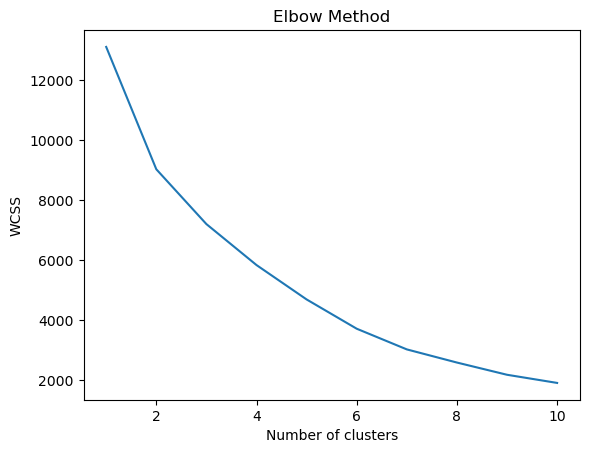

In [48]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Perform K-means clustering

In [49]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(reduced_features)

In [50]:
kmeans

KMeans(n_clusters=3, random_state=42)

In [51]:
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

# Add cluster labels to the features DataFrame

In [52]:
features['Cluster'] = cluster_labels

In [53]:
features['Cluster']

0       0
1       0
2       0
3       0
4       0
       ..
4367    0
4368    0
4369    0
4370    0
4371    0
Name: Cluster, Length: 4372, dtype: int32

# Visualize the clusters using scatter plots

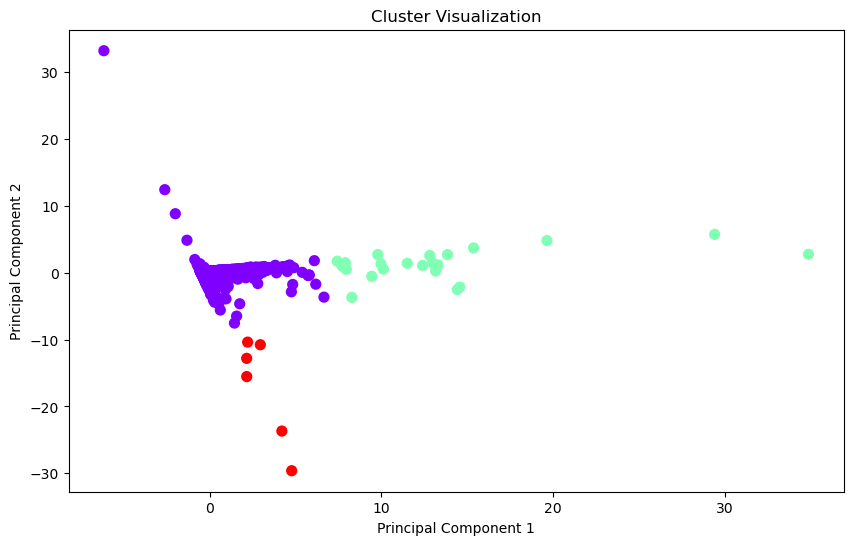

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='rainbow', s=50)
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Profile each cluster

In [55]:
cluster_profiles = features.groupby('Cluster').agg({
    'OrderFrequency': 'mean',
    'PurchaseHistory': 'mean',
    'AvgSpending': 'mean',
})

In [56]:
cluster_profiles

,OrderFrequency,PurchaseHistory,AvgSpending
Cluster,,,
0,4.653085,879.420580,25.161954
1,89.272727,48401.818182,149.569638
2,2.166667,3640.833333,2248.350741


In [57]:
cluster_profiles = features.groupby('Cluster').agg({
    'OrderFrequency': 'mean',
    'PurchaseHistory': 'mean',
    'AvgSpending': 'mean',
    'CustomerID': 'count',  # Number of customers in each cluster
}).rename(columns={'CustomerID': 'CustomerCount'})

# You can add more cluster-specific metrics as needed
print(cluster_profiles)

         OrderFrequency  PurchaseHistory  AvgSpending  CustomerCount
Cluster                                                             
0              4.653085       879.420580    25.161954           4344
1             89.272727     48401.818182   149.569638             22
2              2.166667      3640.833333  2248.350741              6


#  Interpretation and insights

In [60]:
for cluster_num in range(len(cluster_profiles)):
    print(f'Cluster {cluster_num}:')
    print(f'   - Mean Order Frequency: {cluster_profiles["OrderFrequency"][cluster_num]:.2f}')
    print(f'   - Mean Purchase History: {cluster_profiles["PurchaseHistory"][cluster_num]:.2f}')
    print(f'   - Mean Average Spending: {cluster_profiles["AvgSpending"][cluster_num]:.2f}')
    print(f'   - Number of Customers: {cluster_profiles["CustomerCount"][cluster_num]}')
    print()

# Discuss the implications for the e-commerce business, such as targeted marketing, customer retention, or inventory management


Cluster 0:
   - Mean Order Frequency: 4.65
   - Mean Purchase History: 879.42
   - Mean Average Spending: 25.16
   - Number of Customers: 4344

Cluster 1:
   - Mean Order Frequency: 89.27
   - Mean Purchase History: 48401.82
   - Mean Average Spending: 149.57
   - Number of Customers: 22

Cluster 2:
   - Mean Order Frequency: 2.17
   - Mean Purchase History: 3640.83
   - Mean Average Spending: 2248.35
   - Number of Customers: 6



# Add cluster centers to the plot

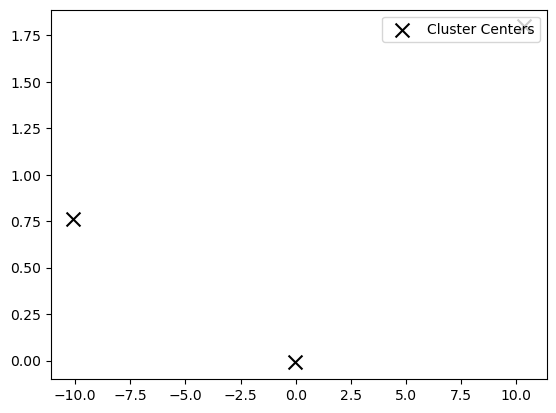

In [63]:
cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=100, label='Cluster Centers')

plt.legend(loc='upper right')
plt.show()

#  histograms for feature distribution within each cluster

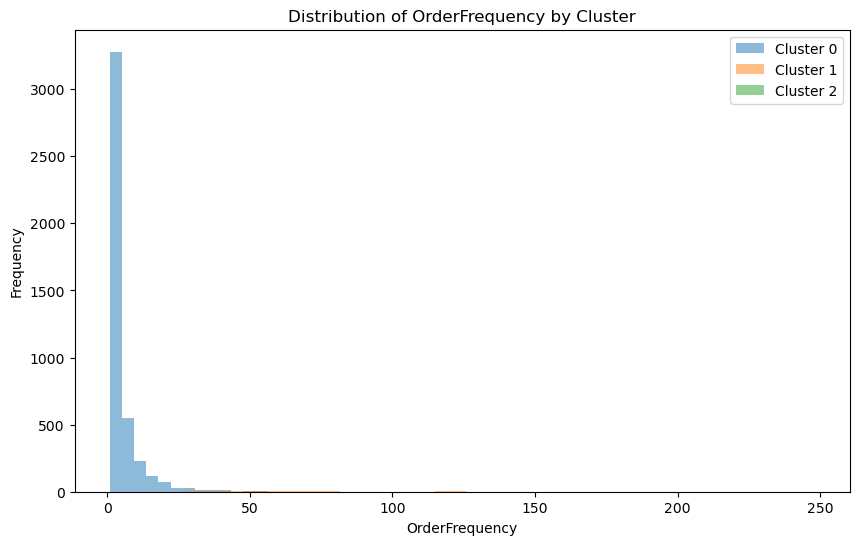

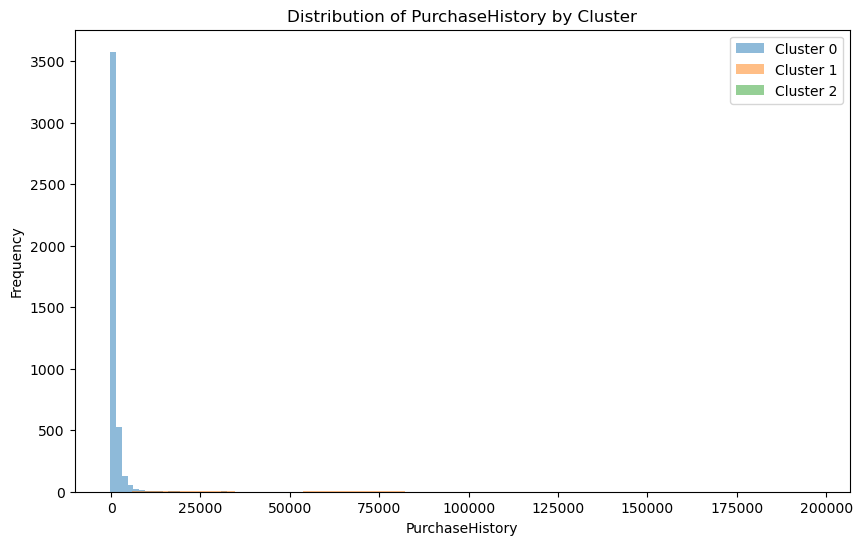

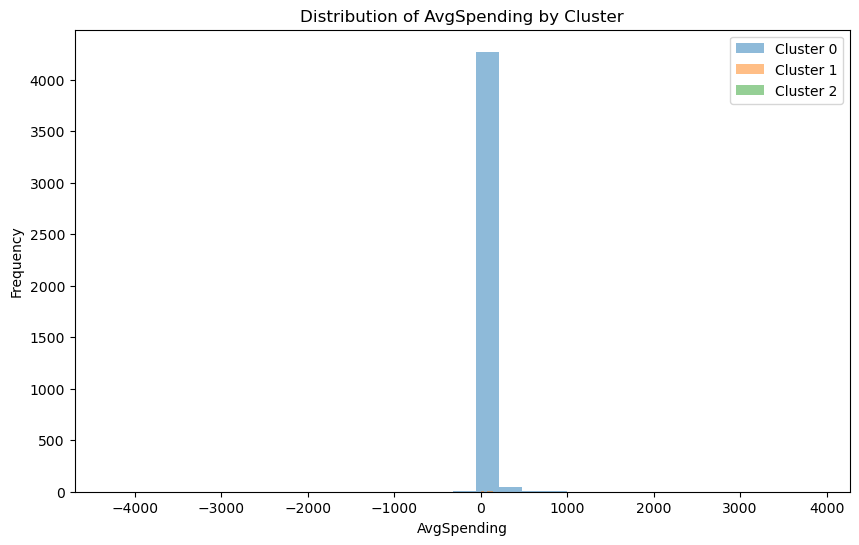

In [66]:
features_to_plot = ['OrderFrequency', 'PurchaseHistory', 'AvgSpending']

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    for cluster_num in range(len(cluster_profiles)):
        plt.hist(features[features['Cluster'] == cluster_num][feature], bins=20, alpha=0.5,
                 label=f'Cluster {cluster_num}')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()